In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# Importo la Data

In [2]:
df2 = pd.read_csv("ProjectClean2.csv")

In [3]:
df2.head()

,host_since,host_location,host_is_superhost,host_identity_verified,host_has_profile_pic,neighbourhood,latitude,longitude,room_type,accommodates,...,review_scores_value,reviews_per_month,instant_bookable,bathroom_type,has_license,has_terrace,has_wifi,pet_allowed,has_AC,has_kitchen
0,4646,spain,False,True,True,eixample,41.401810,2.17610,entire_home_apt,2,...,4.67,1.15,True,1,True,True,True,False,True,True
1,4646,spain,False,True,True,ciutat_vella,41.379360,2.17376,entire_home_apt,6,...,4.50,0.02,False,1,True,False,True,False,False,True
2,5312,spain,False,True,True,eixample,41.405560,2.17262,entire_home_apt,8,...,4.30,0.30,True,1,True,True,True,False,True,True
3,5263,spain,False,True,True,sant_marti,41.412432,2.21975,entire_home_apt,5,...,4.64,0.48,False,1,True,True,True,False,True,True
4,5180,spain,False,True,True,gracia,41.405660,2.17015,entire_home_apt,6,...,4.50,0.77,False,1,True,True,True,False,True,True


# Distribucion variable objetivo ('price')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


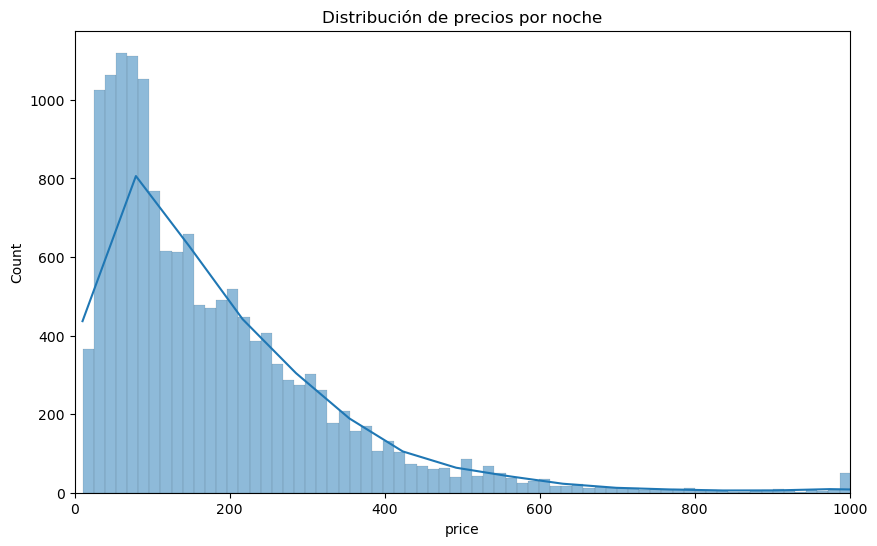

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['price'], kde=True)
plt.xlim([0, 1000])
plt.title('Distribución de precios por noche')
plt.show()

Este gráfico muestra una distribución de precios sesgada hacia la izquierda, donde la mayoría de los precios se concentran en valores bajos, probablemente por debajo de los 1000. Esto sugiere que la mayoría de las propiedades analizadas tienen precios accesibles, lo que podría apuntar a una oferta abundante de opciones económicas. Sin embargo, también se observa una larga cola que se extiende hacia valores altos, indicando la existencia de algunos precios significativamente más elevados que el promedio, posiblemente representando propiedades de lujo. La distribución asimétrica refleja que los precios altos son raros, mientras que los bajos son mucho más comunes, lo que podría indicar un mercado dominado por la accesibilidad con algunas excepciones de mayor costo.

## Relación de las variables categóricas con 'price'

## 'neighbourhood'

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'eixample'),
  Text(1, 0, 'ciutat_vella'),
  Text(2, 0, 'sant_marti'),
  Text(3, 0, 'gracia'),
  Text(4, 0, 'sarria_sant_gervasi'),
  Text(5, 0, 'sants_montjuic'),
  Text(6, 0, 'les_corts'),
  Text(7, 0, 'horta_guinardo'),
  Text(8, 0, 'sant_andreu'),
  Text(9, 0, 'nou_barris')])

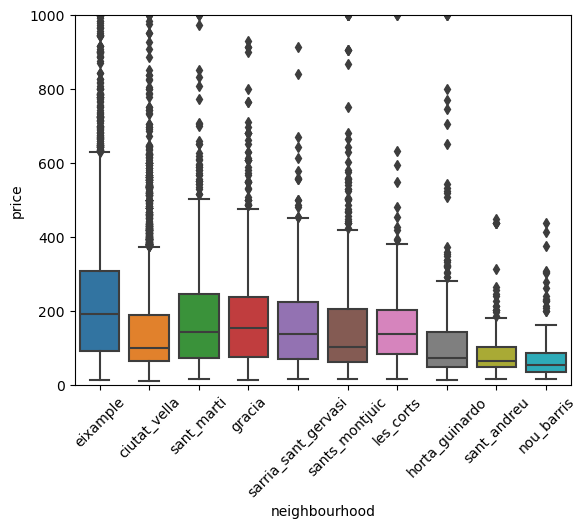

In [5]:
sns.boxplot(x='neighbourhood', y='price', data=df2)
plt.ylim(0, 1000)
plt.xticks(rotation=45)


Este gráfico muestra la distribución de precios por diferentes barrios, con una gran concentración de precios bajos en la mayoría de los vecindarios. Sin embargo, hay algunos valores atípicos que destacan con precios significativamente más altos, especialmente en los barrios como Eixample y Ciutat Vella, donde se observan los precios más extremos, llegando hasta los 14,000. Estos barrios parecen tener una mayor variabilidad de precios en comparación con otros como Nou Barris o Sant Andreu, que tienen precios más consistentes y menos dispersos. Esto podría indicar que áreas como Eixample y Ciutat Vella tienen una mayor oferta de propiedades de lujo, mientras que en barrios más periféricos, los precios tienden a ser más estables y accesibles.

## 'host_location'

(array([0, 1, 2]),
 [Text(0, 0, 'spain'), Text(1, 0, 'no_info'), Text(2, 0, 'other')])

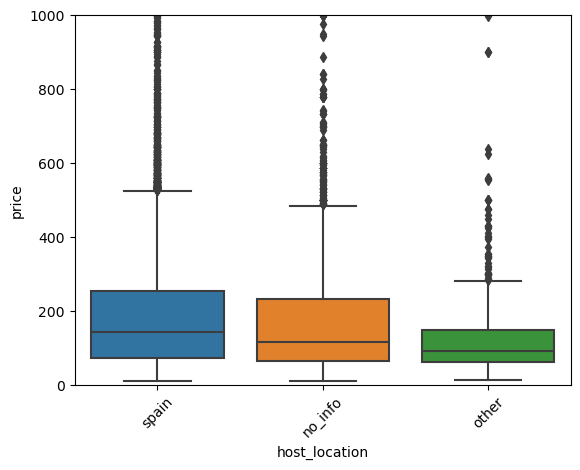

In [6]:
sns.boxplot(x='host_location', y='price', data=df2)
plt.ylim(0, 1000)
plt.xticks(rotation=45)

Este gráfico muestra la relación entre la ubicación del anfitrión y los precios de los alojamientos. Algunos patrones observados:

España (Spain): Los anfitriones ubicados en España presentan una mayor dispersión de precios, con varios valores atípicos que alcanzan hasta los 14,000. Esto sugiere que los anfitriones locales pueden tener una mayor oferta de propiedades de lujo o con precios más altos.

Sin información (no_info): Los precios de los anfitriones sin ubicación clara tienen menos variabilidad en comparación con los anfitriones en España, aunque todavía hay algunos precios altos que superan los 4,000.

Fuera de España (no_spain): Los anfitriones ubicados fuera de España parecen tener los precios más bajos y más consistentes, con menos valores extremos, lo que sugiere una oferta de alojamientos más accesibles.

En general, los anfitriones en España tienden a ofrecer una mayor variedad de precios, incluyendo opciones más caras, en comparación con los de fuera del país o sin información.

## 'room_type'

(array([0, 1, 2, 3]),
 [Text(0, 0, 'entire_home_apt'),
  Text(1, 0, 'private_room'),
  Text(2, 0, 'hotel_room'),
  Text(3, 0, 'shared_room')])

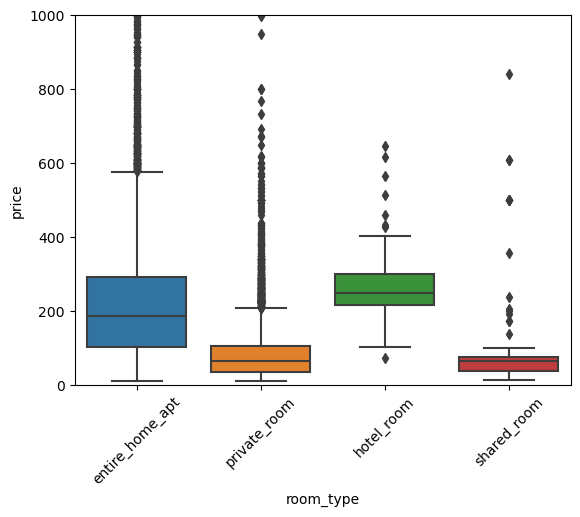

In [7]:
sns.boxplot(x='room_type', y='price', data=df2)
plt.ylim(0, 1000)
plt.xticks(rotation=45)

El gráfico muestra un boxplot de precios segmentados por tipo de alojamiento (room_type). Las categorías incluyen: entire_home_apt, private_room, hotel_room, y shared_room.

Variabilidad y precio máximo: La categoría entire_home_apt tiene la mayor variabilidad en precios y presenta varios outliers que superan los 10,000 unidades monetarias, lo que indica la posibilidad de propiedades de lujo o exclusivas.

Precios moderados: Las otras categorías (private_room, hotel_room, shared_room) tienen precios significativamente más bajos y menos dispersión. Aunque hay algunos outliers, estos son mucho menos extremos comparados con los de entire_home_apt.

Comparación general: En términos generales, entire_home_apt tiende a ser más costoso, mientras que las otras opciones ofrecen alojamientos más asequibles.

Conclusión: entire_home_apt es la opción más cara y variable, posiblemente reflejando una mayor diversidad en las propiedades y servicios ofrecidos. Las otras categorías son más consistentes y accesibles en precio.

# Convertir variables categóricas a variables dummy

In [8]:
df2 = pd.get_dummies(
    df2, 
    columns=['neighbourhood', 'host_location', 'room_type'], 
    drop_first=True
)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15189 entries, 0 to 15188
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   host_since                         15189 non-null  int64  
 1   host_is_superhost                  15189 non-null  bool   
 2   host_identity_verified             15189 non-null  bool   
 3   host_has_profile_pic               15189 non-null  bool   
 4   latitude                           15189 non-null  float64
 5   longitude                          15189 non-null  float64
 6   accommodates                       15189 non-null  int64  
 7   bathrooms                          15189 non-null  float64
 8   bedrooms                           15189 non-null  float64
 9   beds                               15189 non-null  float64
 10  price                              15189 non-null  float64
 11  minimum_nights                     15189 non-null  flo

# Matriz de Correlacion

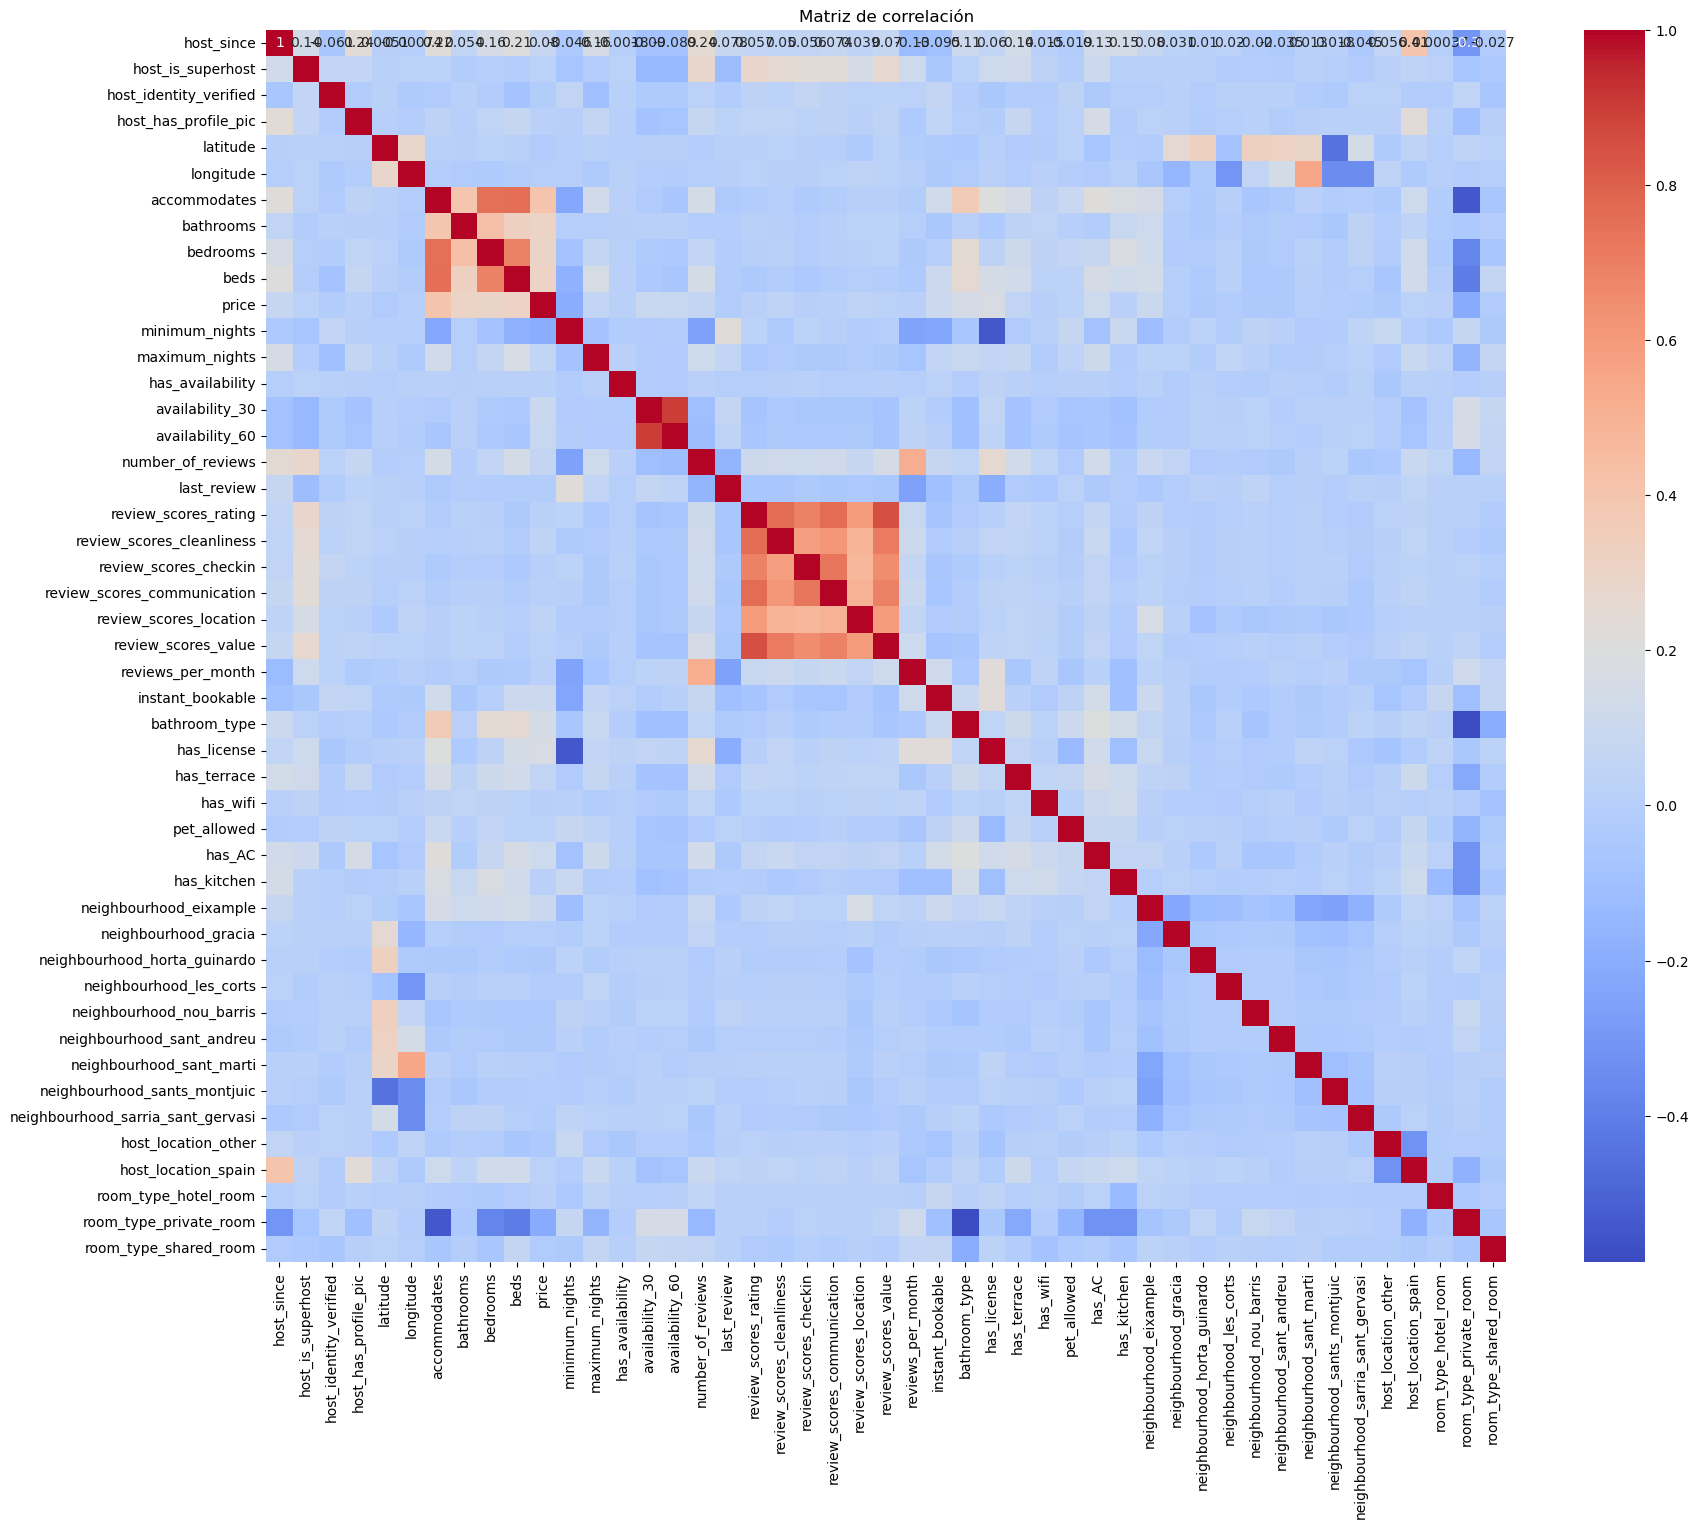

In [10]:
correlacion = df2.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [11]:
correlacion["price"]

host_since                           0.080338
host_is_superhost                    0.022703
host_identity_verified              -0.017460
host_has_profile_pic                 0.015827
latitude                            -0.026736
longitude                           -0.001039
accommodates                         0.406440
bathrooms                            0.299193
bedrooms                             0.296159
beds                                 0.306178
price                                1.000000
minimum_nights                      -0.203179
maximum_nights                       0.060680
has_availability                     0.010551
availability_30                      0.099842
availability_60                      0.085193
number_of_reviews                    0.066694
last_review                         -0.012650
review_scores_rating                 0.018213
review_scores_cleanliness            0.044430
review_scores_checkin                0.004252
review_scores_communication       

# Identificación de variables influyentes

## Division datos X,y

In [12]:
X = df2.drop('price', axis=1)  # Variables predictoras
y = df2['price']               # Variable objetivo

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generar modelo

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [16]:
# Definir el modelo
rf_model = RandomForestRegressor(random_state=42)

# Definir la rejilla de hiperparámetros para GridSearch
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
}

# Búsqueda de los mejores hiperparámetros
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Resultados
print("Mejores hiperparámetros: ", grid_search.best_params_)

Mejores hiperparámetros:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Entrenar el modelo con los mejores parámetros

In [17]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Evaluación del modelo

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicciones
y_pred = best_rf_model.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 66.08631029969592
RMSE: 237.60041480320717
R2 Score: 0.5611545896375385


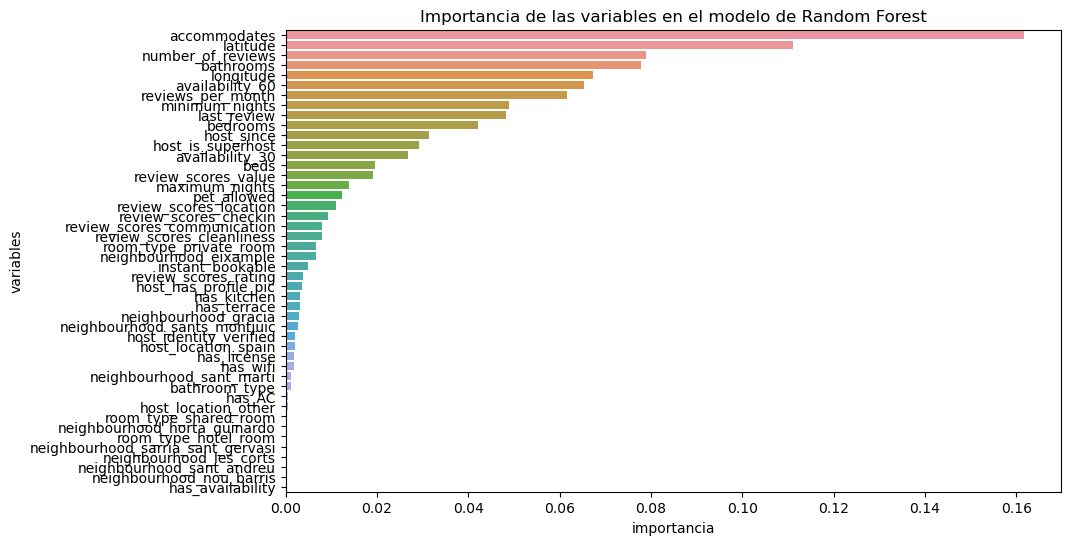

In [19]:
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame con las importancias
feature_importances = pd.DataFrame({'variables': feature_names, 'importancia': importances})
feature_importances = feature_importances.sort_values(by='importancia', ascending=False)

# Visualización de las importancias
plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='variables', data=feature_importances)
plt.title('Importancia de las variables en el modelo de Random Forest')
plt.show()